## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

import plotly.express as px
import plotly.graph_objects as go

sns.set()

## Load Clean Data

In [2]:
# The supplied CSV data file is the DataSet directory
fraud_df = pd.read_csv('../data/fraud_df.csv')

## Check Data

In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   CASH_IN         int64  
 9   CASH_OUT        int64  
 10  DEBIT           int64  
 11  PAYMENT         int64  
 12  TRANSFER        int64  
dtypes: float64(5), int64(8)
memory usage: 631.1 MB


In [4]:
fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [5]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,2.199226e-01,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.141940e-01,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


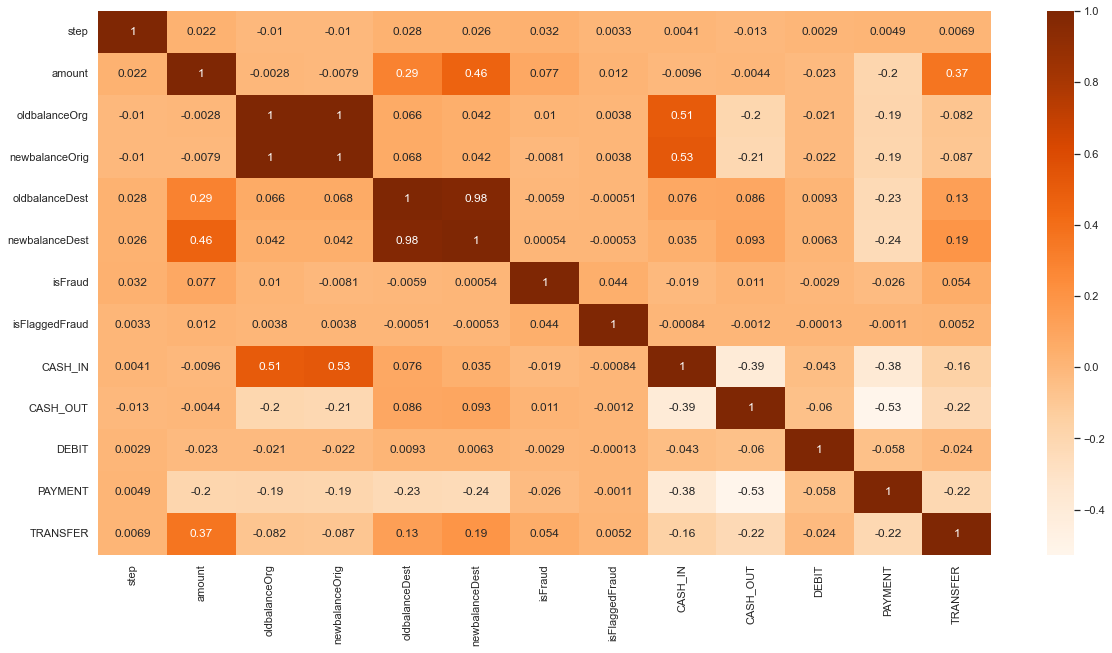

In [6]:
 # Check for correlation among data
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(fraud_df.corr(), annot=True, cmap="Oranges" ,ax = ax)
plt.show()

In [7]:
fraud_df.corr()['isFraud'].sort_values(ascending = False)

isFraud           1.000000
amount            0.076688
TRANSFER          0.053869
isFlaggedFraud    0.044109
step              0.031578
CASH_OUT          0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
DEBIT            -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
CASH_IN          -0.019089
PAYMENT          -0.025697
Name: isFraud, dtype: float64

In [8]:
# isFalggedFraud is not a releavnt quantity because it is classification based on transaction value, so let's drop it
fraud_df.drop(columns='isFlaggedFraud', inplace=True)
fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


## Check for multicollinearity

In [9]:
## Check for multicollineariaty
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
X_variables  =fraud_df[fraud_df.columns.tolist()]
X_variables

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


In [11]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [12]:
vif_data[vif_data['VIF']<=12]

,feature,VIF
0,step,1.003447
1,amount,4.073803
6,isFraud,1.223435
7,CASH_IN,2.818193
8,CASH_OUT,2.096413
9,DEBIT,1.021107
10,PAYMENT,2.000994
11,TRANSFER,1.479244


In [13]:
relevant_features = vif_data.feature[vif_data['VIF']<=15].tolist()
relevant_features

['step',
 'amount',
 'isFraud',
 'CASH_IN',
 'CASH_OUT',
 'DEBIT',
 'PAYMENT',
 'TRANSFER']

In [14]:
## Check the distribution of target vraibale
fraud_df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
fraud_df['isFraud'].value_counts(normalize = True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [16]:
# The data is skewed heavily to not Fraud so need balancing

### Balance the data

In [17]:
tmp_df = fraud_df.groupby(['isFraud'])

In [ ]:
final_df =pd.DataFrame(tmp_df.apply(lambda x: x.sample(tmp_df.size().min())).reset_index(drop = True))
final_df

In [ ]:
final_df = final_df[relevant_features]

In [ ]:
final_df

In [ ]:
final_df.to_csv('../clean_data/final_df.csv',index=False)